ONION OR NOT

Dataset of The Onion articles and real "Onion-like" news articles from the subreddit r/NotTheOnion. The Onion articles are labeled 1 and the r/NotTheOnion articles are labeled 0.

1) IMPORTING LIBRARIES



In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import os
import csv
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

Using TensorFlow backend.


2) DATA PREPROCESSING

In [2]:
data=pd.read_csv('../input/onion-or-not/OnionOrNot.csv')
data.head()

,text,label
0,Entire Facebook Staff Laughs As Man Tightens P...,1
1,Muslim Woman Denied Soda Can for Fear She Coul...,0
2,Bold Move: Hulu Has Announced That They’re Gon...,1
3,Despondent Jeff Bezos Realizes He’ll Have To W...,1
4,"For men looking for great single women, online...",1


In [3]:
sentence = data['text'].values.tolist()
result= data['label'].values.tolist()

3) TRAIN-TEST SPLIT

In [4]:
X_train, X_test, Y_train,Y_test= train_test_split(sentence, result, test_size=0.2)

In [5]:
Y_train=np.array(Y_train)
Y_test=np.array(Y_test)

4) NLP TECHNIQUES

In [27]:
tokenizer=Tokenizer(num_words=5000, oov_token='<OOV>')
tokenizer.fit_on_texts(X_train)
word_index=tokenizer.word_index
sequences=tokenizer.texts_to_sequences(X_train)
padded_train=pad_sequences(sequences,250,truncating='post')

In [28]:
sequences_test=tokenizer.texts_to_sequences(X_test)
padded_test=pad_sequences(sequences_test,250,truncating='post')

In [29]:
print(padded_train.shape)
print(padded_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(19200, 250)
(4800, 250)
(19200,)
(4800,)


5) CONVOLUTIONAL NEURAL NETWORK

In [35]:
model= tf.keras.Sequential([
    tf.keras.layers.Embedding(5000,16,input_length=250),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

In [36]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 250, 16)           80000     
_________________________________________________________________
flatten_3 (Flatten)          (None, 4000)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 6)                 24006     
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 7         
Total params: 104,013
Trainable params: 104,013
Non-trainable params: 0
_________________________________________________________________


In [37]:
history=model.fit(padded_train, Y_train, epochs=15, validation_data=(padded_test, Y_test))

Train on 19200 samples, validate on 4800 samples
Epoch 1/15
19200/19200 [==============================] - 4s 188us/sample - loss: 0.5091 - accuracy: 0.7483 - val_loss: 0.3598 - val_accuracy: 0.8402
Epoch 2/15
19200/19200 [==============================] - 3s 173us/sample - loss: 0.2794 - accuracy: 0.8839 - val_loss: 0.3304 - val_accuracy: 0.8602
Epoch 3/15
19200/19200 [==============================] - 3s 158us/sample - loss: 0.1938 - accuracy: 0.9261 - val_loss: 0.3429 - val_accuracy: 0.8575
Epoch 4/15
19200/19200 [==============================] - 3s 162us/sample - loss: 0.1310 - accuracy: 0.9549 - val_loss: 0.3846 - val_accuracy: 0.8477
Epoch 5/15
19200/19200 [==============================] - 4s 187us/sample - loss: 0.0795 - accuracy: 0.9770 - val_loss: 0.4391 - val_accuracy: 0.8421
Epoch 6/15
19200/19200 [==============================] - 3s 179us/sample - loss: 0.0440 - accuracy: 0.9907 - val_loss: 0.5003 - val_accuracy: 0.8396
Epoch 7/15
19200/19200 [===========================

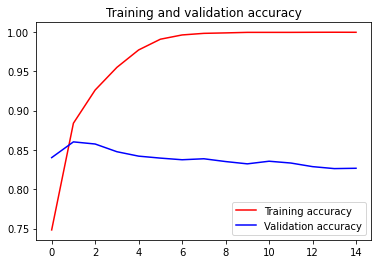

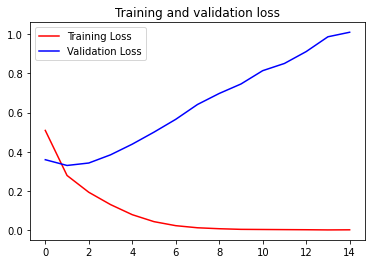

In [38]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()